In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('gastext.csv',usecols=[0,1], encoding='ISO-8859-1')
df

,Cust_ID,Comment
0,1,prices ...
1,10,"clean shower and restroom, easy in and out ..."
2,100,productx price and rewards ...
3,102,food ...
4,103,not real busy ...
...,...,...
282,94,they are generally cleaner. People tend to be...
283,95,free pop and coffee refills and showers after ...
284,96,free pop and coffee refills after 1000 quantp ...
285,98,I believe they both have clean truck stops and...


In [ ]:
#we apply text mining to comment

In [ ]:
import gensim
from gensim import corpora,models

docs = df.Comment
docs

0      prices                                        ...
1      clean shower and restroom, easy in and out    ...
2      productx price and rewards                    ...
3      food                                          ...
4      not real busy                                 ...
                             ...                        
282    they are generally cleaner.  People tend to be...
283    free pop and coffee refills and showers after ...
284    free pop and coffee refills after 1000 quantp ...
285    I believe they both have clean truck stops and...
286    .service                                      ...
Name: Comment, Length: 287, dtype: object

In [ ]:
#toxenize Comment first. Decompose each text doc as collection of ind words.

In [ ]:
corpus = [doc.split() for doc in docs] #use space as default separator
corpus

[['prices', '.more', 'reward', 'points', '.prices', '.'],
 ['clean',
  'shower',
  'and',
  'restroom,',
  'easy',
  'in',
  'and',
  'out',
  '.cash',
  '2',
  'cents',
  'per',
  'quantp',
  'credit',
  '1',
  'cent',
  'per',
  'quantp',
  '.too',
  'pricey',
  '.donêt',
  'even',
  'use',
  'it',
  'anymore'],
 ['productx',
  'price',
  'and',
  'rewards',
  '.cash',
  'rewards',
  'checks',
  '.too',
  'expensive',
  '.little',
  'returns'],
 ['food', '.showers', 'donêt', 'fall', 'off', '.', '.'],
 ['not',
  'real',
  'busy',
  '.',
  '.customers',
  'parked',
  'on',
  'productx',
  'island',
  'and',
  'no',
  'authority',
  'making',
  'them',
  'move',
  '.'],
 ['points', 'food', '.showers', 'donêt', 'fall', 'off', '.', '.'],
 ['the',
  'productx',
  'is',
  'better',
  'than',
  'compT',
  '.not',
  'sure',
  '.',
  '.'],
 ['convenient',
  '-',
  'price',
  'of',
  'productx',
  'and',
  'food',
  '.easy',
  'to',
  'use',
  '.',
  '.harder',
  'to',
  'use'],
 ['cleaner,',
 

In [ ]:
#some words appear mult times
#IDENTIFY UNIQUE TERMS
#Each unique term becomes a feature
#Create dictionary for these unique words

In [ ]:
dictionary = corpora.Dictionary(corpus)
dictionary

In [ ]:
DFM = [dictionary.doc2bow(doc) for doc in corpus]

In [ ]:
term_maps = dictionary.token2id  #we create id for each term
term_maps

In [ ]:
term_maps = {v: k for k, v in term_maps.items()}
term_maps

In [ ]:
#Stemming
# Convert DTM to array, and rename with our term mappings.
myDFM = pd.DataFrame(
    gensim.matutils.corpus2csc(DFM).T.toarray()).rename(columns= term_maps)
myDFM
#This is vector representation org 287 docs
#we have 1037 features...high dimentional...a lot of zeros
#PREPROCESS

,.,.more,.prices,points,prices,reward,.cash,.donêt,.too,1,...,during,policy.,questions,(print,.charge,anywhere),believe,both,computer,receipt
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# FREQUNCY COUNT-Top features
myDFM.sum().sort_values(ascending = False)

.           235.0
and         133.0
to          110.0
points       84.0
showers      82.0
            ...  
call          1.0
current       1.0
good;         1.0
identify      1.0
receipt       1.0
Length: 1037, dtype: float64

In [ ]:
#PREPROCESS
#REMOVE PUNCTUATION MARKS by string manipulation
#Don't mess with org text and hence create new column
# \w: Matches Unicode word characters
# \s: Matches Unicode whitespace characters

df['Cleaned Comments'] = df['Comment'].str.replace(r'[^\w\s]+', '')

<ipython-input-14-9b08beedfbc0>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned Comments'] = df['Comment'].str.replace(r'[^\w\s]+', '')


In [ ]:
# Verify punctuation is removed.
df['Cleaned Comments']

0      prices                                        ...
1      clean shower and restroom easy in and out     ...
2      productx price and rewards                    ...
3      food                                          ...
4      not real busy                                 ...
                             ...                        
282    they are generally cleaner  People tend to be ...
283    free pop and coffee refills and showers after ...
284    free pop and coffee refills after 1000 quantp ...
285    I believe they both have clean truck stops and...
286    service                                       ...
Name: Cleaned Comments, Length: 287, dtype: object

In [ ]:
# Stopword Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Cleaned Comments'] = df['Cleaned Comments'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Cleaned Comments']

0                            prices reward points prices
1      clean shower restroom easy cash 2 cents per qu...
2      productx price rewards cash rewards checks exp...
3                                food showers donêt fall
4      real busy customers parked productx island aut...
                             ...                        
282    generally cleaner People tend better shopstops...
283    free pop coffee refills showers 1000 quantps p...
284    free pop coffee refills 1000 quantp previous m...
285    I believe clean truck stops good service shops...
286                                      service service
Name: Cleaned Comments, Length: 287, dtype: object

In [ ]:
# Convert all words into lower cases
df['Cleaned Comments'] = df['Cleaned Comments'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
df['Cleaned Comments']

0                            prices reward points prices
1      clean shower restroom easy cash 2 cents per qu...
2      productx price rewards cash rewards checks exp...
3                                food showers donêt fall
4      real busy customers parked productx island aut...
                             ...                        
282    generally cleaner people tend better shopstops...
283    free pop coffee refills showers 1000 quantps p...
284    free pop coffee refills 1000 quantp previous m...
285    i believe clean truck stops good service shops...
286                                      service service
Name: Cleaned Comments, Length: 287, dtype: object

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Cleaned Comments'] = df['Cleaned Comments'].apply(
    lambda x: " ".join(st.stem(x) for x in x.split()))

In [ ]:
df['Cleaned Comments']

0                               price reward point price
1      clean shower restroom easi cash 2 cent per qua...
2      productx price reward cash reward check expens...
3                                 food shower donêt fall
4      real busi custom park productx island author m...
                             ...                        
282    gener cleaner peopl tend better shopstop harde...
283    free pop coffe refil shower 1000 quantp previo...
284    free pop coffe refil 1000 quantp previou month...
285    i believ clean truck stop good servic shopstop...
286                                        servic servic
Name: Cleaned Comments, Length: 287, dtype: object

In [ ]:
# Check DFM after further processing
docs_clean=df['Cleaned Comments']
corpus_clean = [doc.split() for doc in docs_clean]
dictionary_clean = corpora.Dictionary(corpus_clean)
DFM_clean = [dictionary_clean.doc2bow(doc) for doc in corpus_clean]

term_maps = dictionary_clean.token2id
term_maps = {v: k for k, v in term_maps.items()}
# After further processing, only 18 items left in the DFM
term_maps

{0: 'point',
 1: 'price',
 2: 'reward',
 3: '1',
 4: '2',
 5: 'anymor',
 6: 'cash',
 7: 'cent',
 8: 'clean',
 9: 'credit',
 10: 'donêt',
 11: 'easi',
 12: 'even',
 13: 'per',
 14: 'pricey',
 15: 'quantp',
 16: 'restroom',
 17: 'shower',
 18: 'use',
 19: 'check',
 20: 'expens',
 21: 'littl',
 22: 'productx',
 23: 'return',
 24: 'fall',
 25: 'food',
 26: 'author',
 27: 'busi',
 28: 'custom',
 29: 'island',
 30: 'make',
 31: 'move',
 32: 'park',
 33: 'real',
 34: 'better',
 35: 'compt',
 36: 'sure',
 37: 'conveni',
 38: 'harder',
 39: 'cancel',
 40: 'cleaner',
 41: 'friendlier',
 42: 'know',
 43: 'longer',
 44: 'peopl',
 45: 'rude',
 46: 'soon',
 47: 'take',
 48: 'time',
 49: 'drink',
 50: 'free',
 51: 'insid',
 52: 'much',
 53: 'nice',
 54: 'outsid',
 55: 'overpr',
 56: 'product',
 57: 'work',
 58: 'good',
 59: 'prefer',
 60: 'reason',
 61: 'shopstop',
 62: 'card',
 63: 'expir',
 64: 'hassl',
 65: 'pump',
 66: 'quick',
 67: 'select',
 68: 'turn',
 69: 'visa',
 70: 'advanc',
 71: 'cant',


In [ ]:
myDFM_clean = pd.DataFrame(
    gensim.matutils.corpus2csc(DFM_clean).T.toarray()).rename(columns
                                                              = term_maps)
myDFM_clean

,point,price,reward,1,2,anymor,cash,cent,clean,credit,...,mostli,pop,previou,ta,polici,anywher,believ,charg,comput,receipt
0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#usig unigram to impose structure into text
#Every text doc in org file becomes a vector
#the above matrix 287*596----high dimensional and sparse

In [ ]:
#HOW WE USED SVD TO REDUCE DIMENSIONALITY OF 6*18 MATRIX
# Apply tf-idf to adjust weights
tfidf = gensim.models.TfidfModel(DFM_clean)
DFM_tfidf=tfidf[DFM_clean]

In [ ]:
myDFM_clean = pd.DataFrame(
    gensim.matutils.corpus2csc(DFM_tfidf).T.toarray()).rename(columns
                                                              = term_maps)
myDFM_clean

,point,price,reward,1,2,anymor,cash,cent,clean,credit,...,mostli,pop,previou,ta,polici,anywher,believ,charg,comput,receipt
0,0.223061,0.802760,0.553010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.200156,0.211183,0.245439,0.161190,0.450802,0.097388,0.211183,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.165732,0.456681,0.000000,0.000000,0.000000,0.274306,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.247770,0.247770,0.247770,0.282351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.263562,0.263562,0.263562,0.000000,0.300348,0.000000,0.000000,0.000000,0.000000,0.000000
285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105271,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.302334,0.302334,0.302334,0.302334,0.302334


In [ ]:
# Apply SVD to reduce dimensionality of the DFM, from 18-->6(no specific reason...just)
SVD_model = gensim.models.LsiModel(DFM_tfidf, id2word = dictionary_clean,
num_topics = 15)                                                            #num_topics is no of dimension we want to keep
SVD=SVD_model[DFM_tfidf]
SVD_result = pd.DataFrame(gensim.matutils.corpus2csc(SVD).T.toarray())
SVD_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.341006,-0.600064,0.395769,0.045169,-0.102970,-0.035569,-0.350921,0.113563,0.025939,-0.066763,-0.130047,0.089972,0.114842,0.106517,-0.017820
1,0.147608,0.041526,0.025974,-0.024598,0.015422,-0.026471,0.055337,-0.058370,-0.054316,-0.044973,-0.066573,0.170399,-0.177793,0.062801,-0.043038
2,0.163556,-0.221768,0.102973,-0.049265,-0.124955,0.035941,-0.202103,0.111310,0.031254,0.030942,-0.199617,0.084466,0.122566,0.120017,0.058495
3,0.193617,0.110702,0.021293,-0.192558,0.292135,-0.153975,-0.070382,-0.378006,-0.091652,-0.233092,0.007188,0.295860,0.023756,0.004966,0.016228
4,0.089576,-0.011758,-0.059119,-0.019148,0.021303,0.083604,0.006332,-0.028616,0.005888,0.055123,0.049398,0.020475,0.037473,0.162714,0.075908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.162278,0.162268,0.061901,0.039412,0.031752,-0.009755,0.078002,0.161392,0.197413,0.018298,-0.028111,0.067333,-0.206025,0.134628,-0.090894
283,0.144970,0.201451,0.122993,0.020634,0.002075,-0.058359,0.045744,0.200857,0.127361,0.041748,-0.076740,0.116042,-0.304584,0.086419,-0.078128
284,0.247013,0.174732,0.031668,0.071702,0.035578,-0.089322,0.043725,0.215369,0.158765,0.044159,-0.086349,-0.009624,-0.201692,0.173247,-0.004903
285,0.207218,0.018731,-0.088214,0.002292,-0.093261,-0.057680,0.038946,-0.008771,0.086175,0.059342,0.139726,-0.130782,0.038820,0.230066,-0.030027


In [ ]:
#Topic Modeling(use DFM without adjustments.....with raw frequency count )
n_topics = 3
ldamodel = gensim.models.LdaModel(DFM_clean, num_topics=n_topics,
id2word = dictionary_clean,passes=20)

In [ ]:
!pip install pyLDAvis
import pyLDAvis
pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 8.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(ldamodel, DFM_clean, dictionary_clean)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.081497  0.0       1        1  60.811273
1     -0.081497  0.0       2        1  39.188727, topic_info=       Term        Freq       Total Category  logprob  loglift
110  servic   54.000000   54.000000  Default  30.0000  30.0000
32     park   36.000000   36.000000  Default  29.0000  29.0000
17   shower  107.000000  107.000000  Default  28.0000  28.0000
49    drink   29.000000   29.000000  Default  27.0000  27.0000
92      bad   16.000000   16.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
18      use   14.170991   49.185165   Topic2  -4.2932  -0.3076
1     price   11.741314   40.990407   Topic2  -4.4813  -0.3134
184       i    9.044213   32.806852   Topic2  -4.7423  -0.3517
17   shower   12.145187  107.344061   Topic2  -4.4475  -1.2423
10    donêt    8.276313   31.179684   Topic2  -4.8310  -0.3896

[135 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         1  0.208093        1
3         2  0.832373        1
260       1  0.988043     1000
130       1  0.834322    alway
130       2  0.151695    alway
...     ...       ...      ...
18        1  0.711597      use
18        2  0.284639      use
163       1  0.907418      way
163       2  0.151236      way
344       2  0.936870  without

[144 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


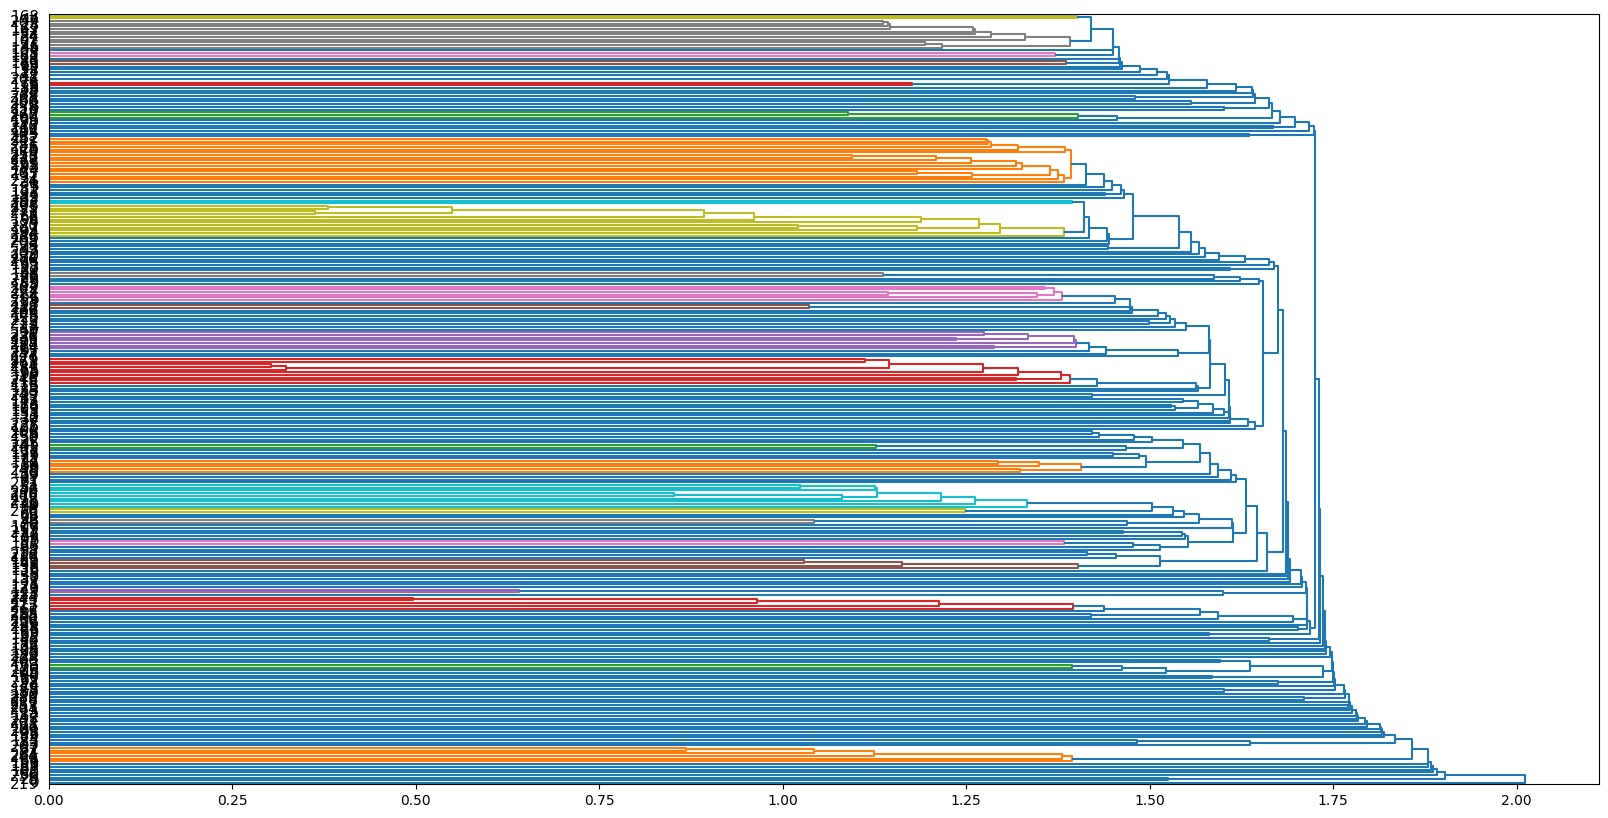

In [ ]:
#Similarity and Clustering(based on cosine similarity metric)
from gensim.similarities import MatrixSimilarity
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
# doc term matrix instead of tfidf = no penalty for idf

index = MatrixSimilarity(DFM_clean, num_features=len(dictionary_clean))
#index is calculated based on cosine similarity.

distance = 1 - index[DFM_clean]

Z = hierarchy.linkage(distance, 'single')
plt.figure(figsize=(20,10))
#plt.ylim([.4, 1.5])
dn = hierarchy.dendrogram(Z, orientation='right', leaf_font_size = '11')

In [ ]:
text_sim = pd.DataFrame(index[DFM_clean])
# Documents similar to Text 0
text_sim[0].sort_values(ascending = False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      1.000000
165    0.816497
25     0.738549
234    0.730297
132    0.730297
         ...   
125    0.000000
126    0.000000
128    0.000000
129    0.000000
286    0.000000
Name: 0, Length: 287, dtype: float32

In [ ]:
# Use the word embedding model to identify similar words


from gensim.models import Word2Vec
model = Word2Vec(corpus_clean,min_count=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Terms most similar to "price"
sim=model.wv.most_similar('price',topn=595) #595 becoz we have 596 words

sim

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('doubl', 0.5170837640762329),
 ('truck', 0.4493006467819214),
 ('productx', 0.44398626685142517),
 ('need', 0.392955482006073),
 ('shower', 0.38715773820877075),
 ('fast', 0.37611284852027893),
 ('wait', 0.3760770857334137),
 ('unlimit', 0.37500715255737305),
 ('let', 0.36174276471138),
 ('use', 0.35378238558769226),
 ('store', 0.3471786379814148),
 ('good', 0.3452126979827881),
 ('i', 0.3423349857330322),
 ('interst', 0.3384864330291748),
 ('competitor', 0.33077889680862427),
 ('check', 0.32635462284088135),
 ('get', 0.3258718252182007),
 ('discount', 0.31766942143440247),
 ('card', 0.31504306197166443),
 ('trip', 0.3080807030200958),
 ('desk', 0.3014557957649231),
 ('pricey', 0.29612505435943604),
 ('make', 0.29513442516326904),
 ('like', 0.2938266694545746),
 ('coffe', 0.2877330183982849),
 ('buy', 0.2842801809310913),
 ('servic', 0.28230956196784973),
 ('horribl', 0.2768755555152893),
 ('want', 0.27185189723968506),
 ('anymor', 0.2704058885574341),
 ('home', 0.2677294611930847),


In [ ]:
# Terms most similar to "price"
sim1=model.wv.most_similar('servic',topn=595) #595 becoz we have 596 words

sim1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('get', 0.36367732286453247),
 ('free', 0.3598216772079468),
 ('2', 0.3464546501636505),
 ('competitor', 0.34398776292800903),
 ('give', 0.3427649438381195),
 ('got', 0.3357543647289276),
 ('rude', 0.33435022830963135),
 ('point', 0.33081546425819397),
 ('desk', 0.32389283180236816),
 ('card', 0.31490233540534973),
 ('unlimit', 0.3069850206375122),
 ('donêt', 0.3064122200012207),
 ('anyth', 0.30165231227874756),
 ('need', 0.29847484827041626),
 ('productx', 0.2897849977016449),
 ('wait', 0.2876317799091339),
 ('price', 0.28230950236320496),
 ('month', 0.2812466025352478),
 ('platinum', 0.2755545973777771),
 ('outdat', 0.2739402651786804),
 ('i', 0.26891806721687317),
 ('restaur', 0.2683766484260559),
 ('5', 0.26689258217811584),
 ('line', 0.2618101239204407),
 ('cent', 0.2594898045063019),
 ('enough', 0.25584495067596436),
 ('shower', 0.254239559173584),
 ('purchas', 0.25007015466690063),
 ('use', 0.24908554553985596),
 ('instead', 0.24600879848003387),
 ('year', 0.24249964952468872),

In [ ]:
freq = pd.Series(' '.join(df['Cleaned Comments']).split()).value_counts()[:30]
freq

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shower      129
point       123
productx     91
servic       67
use          59
get          54
price        49
park         45
card         44
clean        43
i            39
donêt        37
food         36
drink        34
free         30
easi         29
good         27
restaur      26
coffe        23
peopl        23
reward       22
dirti        22
custom       21
bad          20
better       18
discount     18
conveni      17
store        17
stop         16
fast         16
dtype: int64

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


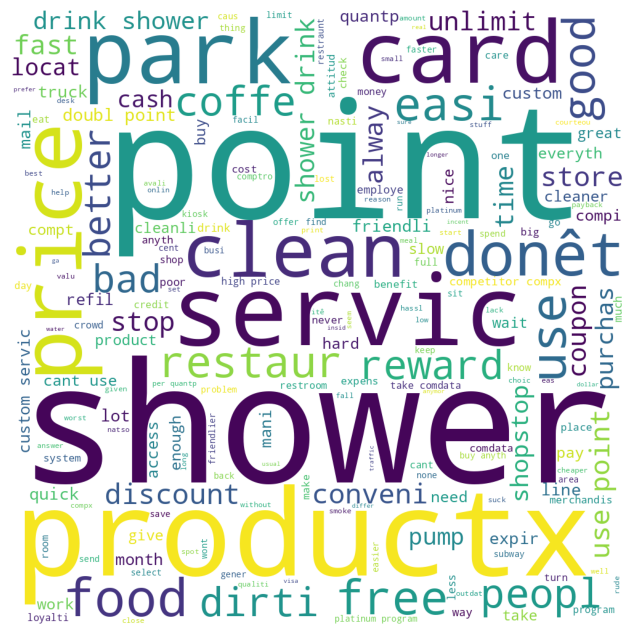

In [ ]:
# Create wordcloud to explore general themes
from wordcloud import WordCloud
comment_words = str(' '.join(df['Cleaned Comments']).split())
import string
# Optional further improvement: punctuation removal for better visulization
comment_words = comment_words.translate(str.maketrans('','',string.punctuation))
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      width=1000,height=1000,
                      ).generate(comment_words)
plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()